**<center><h1 style="font-size: 36px; font-weight: bold">FDC104 FINAL PROJECT</h1></center>**


<center>GROUP 6</center>

> **Outline:**
>1. Dataset description
>2. Importing & Data Cleaning
>3. Exploratory Data Analysis
>4. Data Preprocessing
>5. Modeling

# 1. Dataset description

Giới thiệu về dataset:
Bộ dữ liệu đề cập tới các thành phần và chất lượng của rượu vang "Vinho Verde" của Bồ Đào Nha. Bộ dữ liệu bao gồm 11 thuộc tính và một cột đầu ra. Dưới đây là mô tả chi tiết về thuộc tính của bộ dữ liệu:

* Độ axit cố định (fixed acidity): là thước đo axit không bay hơi hoặc cố định. Các axit này hầy hết bắt nguồn từ nho. Các axit cố định chủ yếu tìm thấy trong rượu vang là tartaric, malic, citric và succinic. Đơn vị tính là (gam/l)
* Độ bay hơi axit (volatile acidity): là thước đo axit dễ bay hơi (hoặc ở dạng khí) của rượu vang. Axit dễ bay hơi chính trong rượu vang là axit axetic, đây cũng là axit chính liên quan đến mùi và vị của giấm. Đơn vị tính là (gam/l)
* Axit citric (citric acid): là axit hữu cơ yếu, được cho vào rượu vang như chất bảo quản tự nhiên và tạo thêm độ chua cho rượu.
* Đường dư (residual sugar): là lượng đường tự nhiên từ trái nho còn lại sau khi quá trình lên men rượu vang đỏ kết thúc. Được tính bằng (gam/l)
* Clorua (chlorides): rượu vang có chứa 2 đến 4 (gam/l) muối của axit khoáng, khác với các axit hữu cơ khác. Chúng là nguyên nhân tiềm năng dẫn đến vị muối của rượu. Như vậy clorua trở thành yếu tố chính cho độ mặn của rượu. Đơn vị tính là (gam/l)
* Lưu huỳnh đioxit tự do (Free sulfur dioxide): là thước đo lượng SO2 không liên kết với các phân tử khác và sử dụng để tính SO2 phân tử. Được dùng trong quá trình sản xuất rượu vang để ngăn chặn quá trình oxi hóa và sự phát triển của vi sinh vật. Đơn vị tính là (mg/l)
* Tổng lượng lưu huỳnh đioxit (total sulfur dioxide): là thước đo của dạng liên kết và tự do của SO2. SO2 liên kết dùng để chỉ các phân tử SO2 được liên kết với các hợp chất khác, chủ yếu là aldehyde, pyruvate và anthocyanins. Được dùng trong sản xuất rượu vang để ngăn chặn quá trình oxi hóa và sự phát triển của vi sinh vật. Lượng SO2 quá nhiều có thể ức chế quá trình lên men và gây ra các hiệu ứng cảm quan không mong muốn. Đơn vị tính là (mg/l)
* Mật độ (density): Đơn vị đo (gam/cm3)
* Độ pH (pH): mô tả độ axit hoặc bazơ của rượu trên thang từ 0 (rất axit) đến 14 (rất bazơ); hầu hết các loại rượu đều nằm trong khoảng 3-4 trên thang độ pH
* Muối sulfat (sulphates): Có công thức hóa học là (S04) (2-). là một chất phụ gia rượu vang có thể góp phần tạo ra khí ga sulfur dioxide (SO2), nó hoạt động như một chất chống vi khuẩn và chống oxi hóa. Đơn vị tính là (gam/l)
* Cồn (alcohol): nồng độ phần trăm cồn của rượu vang
* Chất lượng (quality): là thang điểm từ 1 đến 10 dựa trên dữ liệu cảm quan, trong dữ liệu này là từ 3 đến 9
Đánh giá rượu (good wine): đánh giá rượu đó tốt hay không tốt (1 hay 0). Rượu có điểm từ 6 trở lên là rượu tốt, còn lại là không tốt.

Source: https://www.kaggle.com/code/hnghng/final-redwinequality-annalysis

# 2. Importing & Data Cleaning

## 2.1. Importing


In [170]:
import warnings
warnings.filterwarnings("ignore")

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier 
palette = sns.color_palette("Spectral")
from sklearn.model_selection import (GridSearchCV, KFold, RandomizedSearchCV,
                                     ShuffleSplit, StratifiedKFold,
                                     StratifiedShuffleSplit, cross_val_predict,
                                     cross_val_score, learning_curve,
                                     train_test_split)
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
import plotly.express as px
import plotly.graph_objects as go

In [172]:
path='https://raw.githubusercontent.com/trangmx/fdc104/main/datasets/wine_quality/winequality-white.csv'
df=pd.read_csv(path,sep=';')
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [174]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


## 2.2. Data Cleaning

In [175]:
#Thay thế các khoảng trống trong tên cột
df = df.rename(columns=lambda x: x.replace(' ', '_'))

### 2.2.1. Missing value

In [176]:
df.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Dữ liệu không có missing value.

### 2.2.2. Check for duplicates

In [177]:
df[df.duplicated()]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000,6
20,6.2,0.66,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.800000,8
...,...,...,...,...,...,...,...,...,...,...,...,...
4828,6.4,0.23,0.35,10.3,0.042,54.0,140.0,0.99670,3.23,0.47,9.200000,5
4850,7.0,0.36,0.35,2.5,0.048,67.0,161.0,0.99146,3.05,0.56,11.100000,6
4851,6.4,0.33,0.44,8.9,0.055,52.0,164.0,0.99488,3.10,0.48,9.600000,5
4856,7.1,0.23,0.39,13.7,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6


Có 937 duplicates trong dataset. Nhóm sẽ loại bỏ đi những dòng bị lặp lại.



In [178]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

### 2.2.3. Outliers

Nhóm sẽ sử dụng phương pháp IQR (Inter Quartile Range) để xác định outlier:



In [179]:
numeric_columns = df.select_dtypes(include=['number']).drop(columns="quality").columns

for col in numeric_columns:
    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    num_outliers = len(outliers)

    print(f"Cột '{col}' có {num_outliers} outliers.")

Cột 'fixed_acidity' có 106 outliers.
Cột 'volatile_acidity' có 133 outliers.
Cột 'citric_acid' có 223 outliers.
Cột 'residual_sugar' có 16 outliers.
Cột 'chlorides' có 178 outliers.
Cột 'free_sulfur_dioxide' có 44 outliers.
Cột 'total_sulfur_dioxide' có 14 outliers.
Cột 'density' có 6 outliers.
Cột 'pH' có 46 outliers.
Cột 'sulphates' có 96 outliers.
Cột 'alcohol' có 0 outliers.


Kiểm tra outlier bằng đồ thị

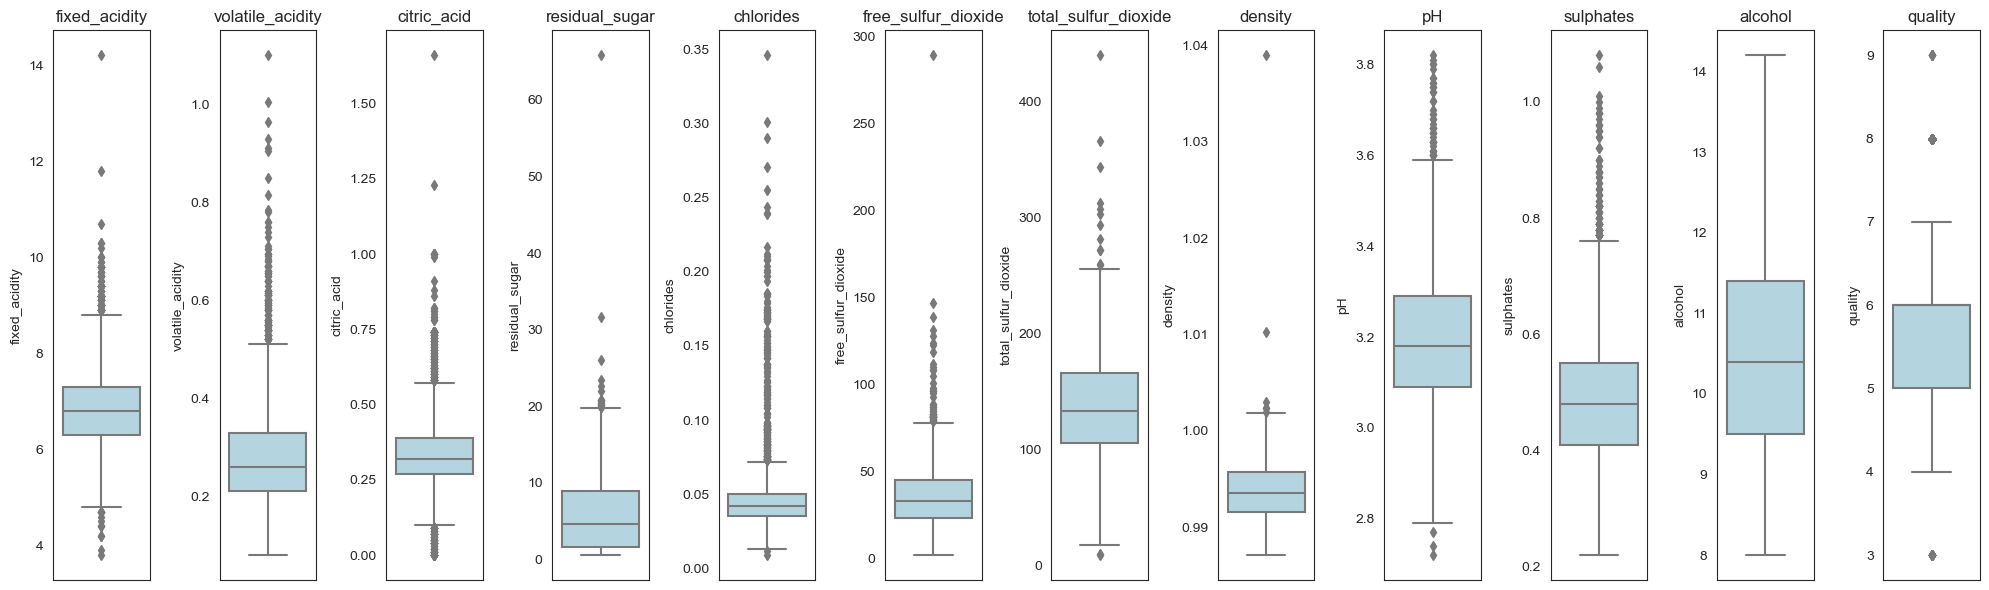

In [180]:
columns = df.columns

fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(20, 6))

for i, col in enumerate(columns):
    sns.boxplot(y = df[col], ax = axes[i], color = 'lightblue')
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


Chỉ có cột 'Alcohol' là không có dấu hiệu của outlier

Nhóm sẽ loại bỏ đi những outlier này

In [181]:
for col in numeric_columns:
    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    num_outliers = len(outliers)

    df = df.drop(outliers.index)
    df.reset_index(drop=True, inplace=True)

Dataset sau khi clean:

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         3207 non-null   float64
 1   volatile_acidity      3207 non-null   float64
 2   citric_acid           3207 non-null   float64
 3   residual_sugar        3207 non-null   float64
 4   chlorides             3207 non-null   float64
 5   free_sulfur_dioxide   3207 non-null   float64
 6   total_sulfur_dioxide  3207 non-null   float64
 7   density               3207 non-null   float64
 8   pH                    3207 non-null   float64
 9   sulphates             3207 non-null   float64
 10  alcohol               3207 non-null   float64
 11  quality               3207 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 300.8 KB


# 3. Exploratory Data Analysis

## 3.1. Distribution plot

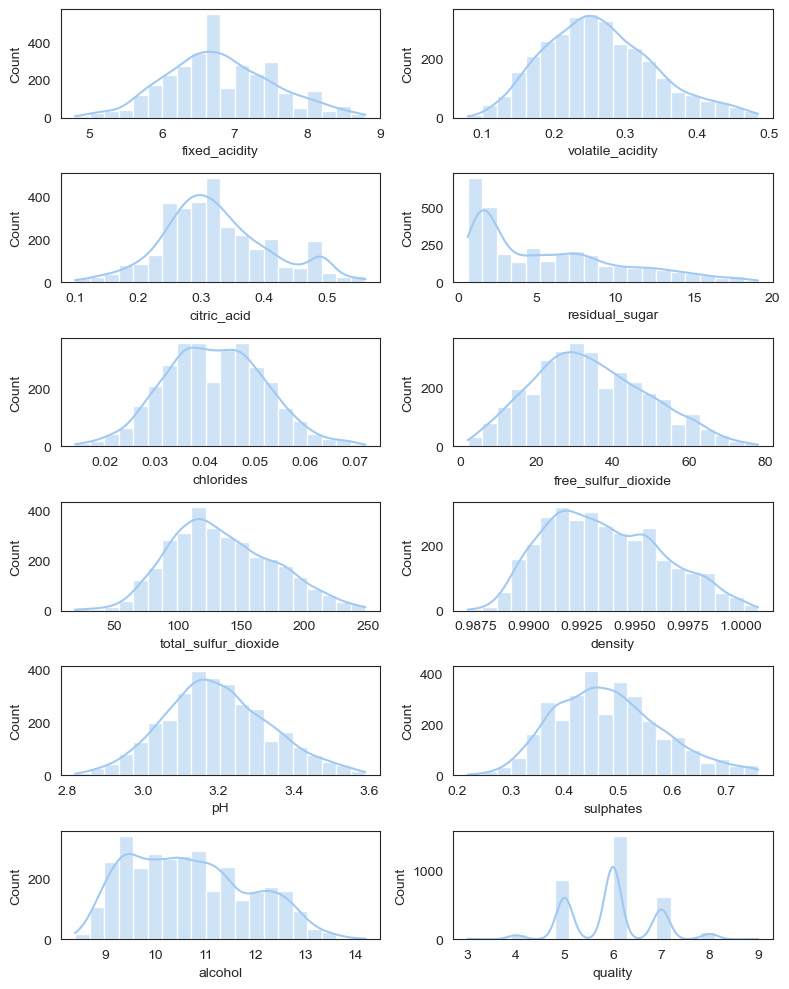

In [183]:
fig, sub_axes = plt.subplots(6, 2, figsize=(8, 10))

for i, col in enumerate(df.columns):
    axes = sns.histplot(data=df, x=col,kde=True,bins=20, ax=sub_axes[i // 2, i % 2],color='#A1C9F1')
    txt = axes.set(xlabel=col)

fig.tight_layout()

- Có thể thấy, phần lớn các biến trong mô hình đều có phân phối chuẩn. 
- Đa số phân phối của các biến bị lệch phải. Tuy nhiên mức độ lệch không lớn.

In [184]:
df.skew() #Tính độ lệch (skewness) của các biến

fixed_acidity           0.209413
volatile_acidity        0.415117
citric_acid             0.387656
residual_sugar          0.841041
chlorides               0.099100
free_sulfur_dioxide     0.311067
total_sulfur_dioxide    0.314252
density                 0.342601
pH                      0.225150
sulphates               0.415900
alcohol                 0.348421
quality                 0.145890
dtype: float64

## 3.2. Correlation

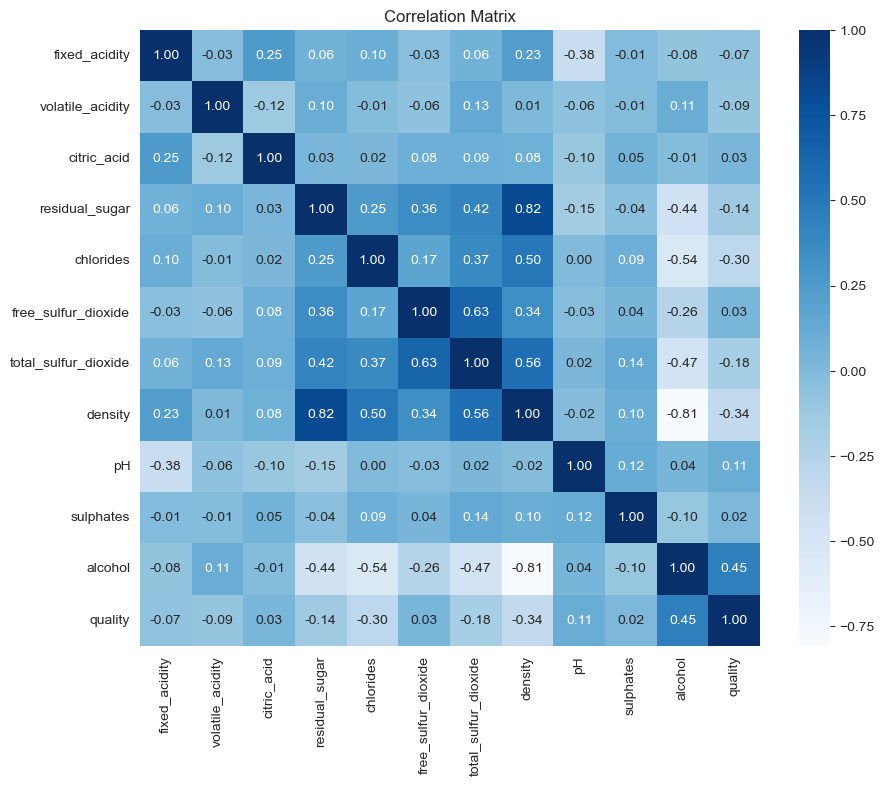

In [185]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='Blues',annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Một vài điểm nổi bật

*   Biến phụ thuộc (quality) không tương quan mạnh với các biến phụ thuộc
*   Có hiện tượng đa cộng tuyến
*   residual_sugar và density có tương quan mạnh (+0.82)
*   total_sulfur_dioxide có mức độ tương quan vừa phải tới free_sulfur_dioxide và density (+0.63)
*   alcohol và density có tương quan mạnh (-0.81)
*   citric_acid, sulphates và free_sulfur_dioxide ít ảnh hướng tới quality



## 3.3. Target Distribution

<Axes: xlabel='quality', ylabel='count'>

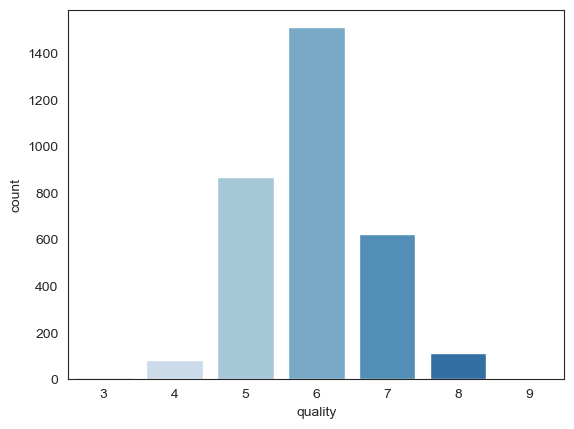

In [186]:
sns.countplot(x='quality', data=df, palette='Blues')

In [187]:
print('Phần lớn chất lượng rượu được đánh nhãn 6, chiếm tới {:.2f}% trong tổng số các chai rượu'.format(len(df[df['quality']==6])*100/len(df)))

Phần lớn chất lượng rượu được đánh nhãn 6, chiếm tới 47.12% trong tổng số các chai rượu


In [188]:
# Nhóm định nghĩa rượu có quality > 5 là rượu có chất lượng tốt
df_wine_quality = df['quality'].apply(lambda x: 1 if x > 5 else 0)

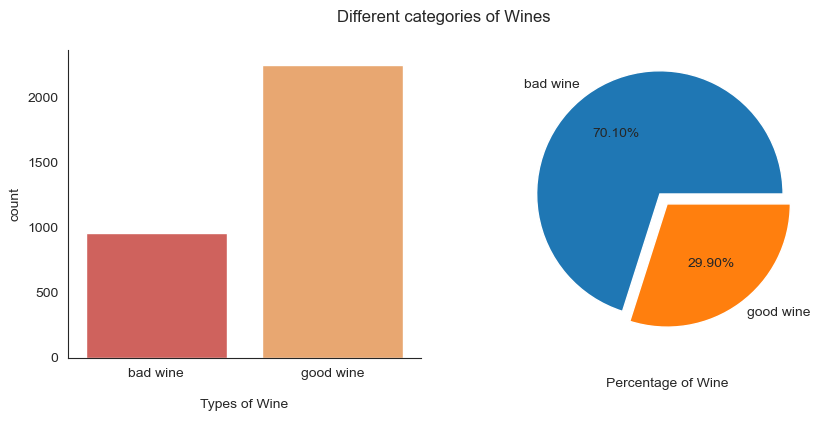

In [189]:
sns.set_style("white")
plt.figure(figsize=(10, 4))

wineScale_insight = df_wine_quality

plt.subplot(1, 2, 1)
sns.countplot(df, x=wineScale_insight, palette=palette)
plt.xticks([0,1], ['bad wine', 'good wine'])
plt.xlabel("\nTypes of Wine")

plt.subplot(1, 2, 2)
plt.pie(wineScale_insight.value_counts().values, labels=['bad wine', 'good wine'], autopct="%.2f%%", explode=[0.1, 0])
plt.xlabel("\nPercentage of Wine")

plt.suptitle('Different categories of Wines')
sns.despine()

Có sự chênh lệch giữa lượng rượu được dán nhãn "good" và phần còn lại.

## 3.4. Features

Nhóm sẽ tìm hiểu kĩ hơn về 5 biến có tương quan mạnh mẽ nhất với chất lượng rượu. Cụ thể là: 'alcohol', 'density', 'chlorides', 'residual_sugar' và 'total_sulfur_dioxide'.


In [190]:
def num_plot(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0],color='#A1C9F1')
    ax[0].set(yticks=[])
    sns.histplot(x=col, data=df, ax=ax[1],color='#A1C9F1')
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='#5586B0', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),2)) + symb)
    plt.axvline(df[col].median(), color='#B12051', linewidth=2.2, label='median='+ str(np.round(df[col].median(),2)) + symb)
    plt.axvline(df[col].mode()[0], color='#011F82', linewidth=2.2, label='mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=16,fancybox=True, shadow=True)
    plt.tight_layout()
    plt.show()

### Residual Sugar

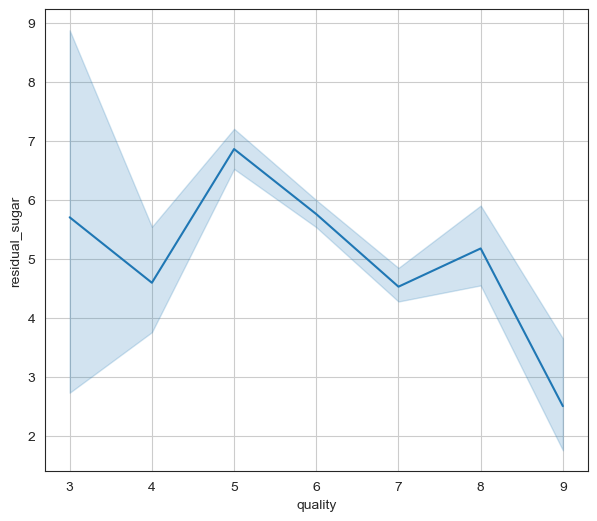

In [191]:
plt.figure(figsize=(7,6))
sns.lineplot(data=df, x="quality",y="residual_sugar")
plt.grid()
plt.show()

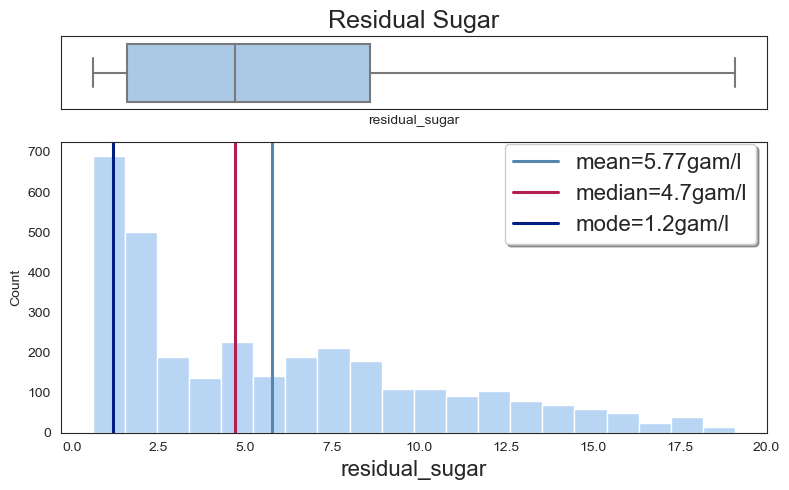

In [192]:
num_plot(df, 'residual_sugar','Residual Sugar','gam/l')

>- Residual sugar dao động trong khoảng 1-19, chủ yếu tập trung ở mức thấp (1,2 gam/l)
>- Phần lớn là rượu semi-dry (có lượng đường dư từ 0,5-1,49 gam/l)
>- Các chai rượu có chất lượng tốt có lượng đường dư thấp hơn so với phần còn lại
>- Trong thực tế, lượng đường dư không có tác động lớn tới chất lượng rượu. Tuy nhiên, lượng đường dư nhiều có thể ảnh hưởng tới sự ổn định khi nó kích thích quá trình lên men lại

### Density

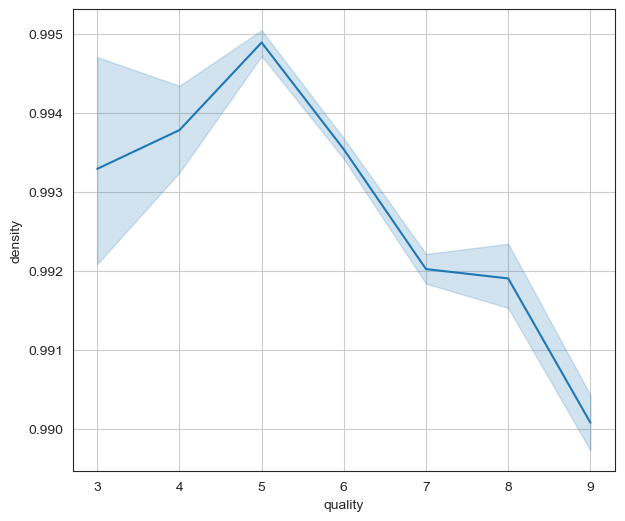

In [193]:
plt.figure(figsize=(7,6))
sns.lineplot(data=df, x="quality",y="density")
plt.grid()
plt.show()

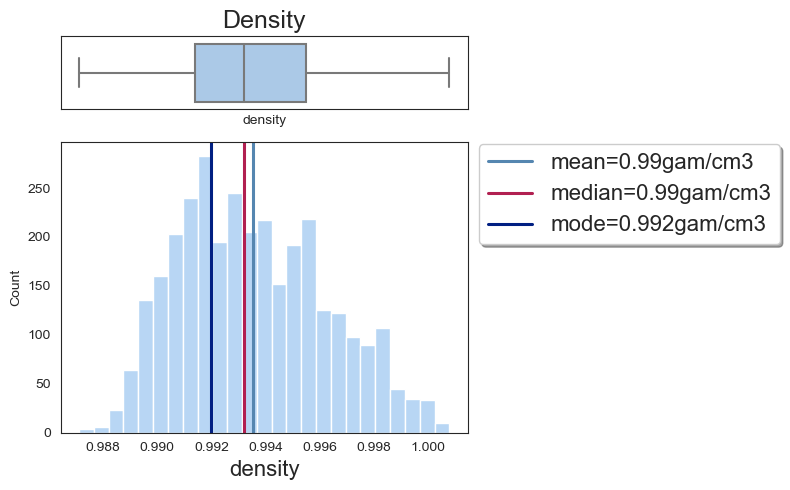

In [194]:
num_plot(df, 'density','Density','gam/cm3')

> Không có sự chênh lệch rõ rệt trong density của các chai rượu

### Chlorides

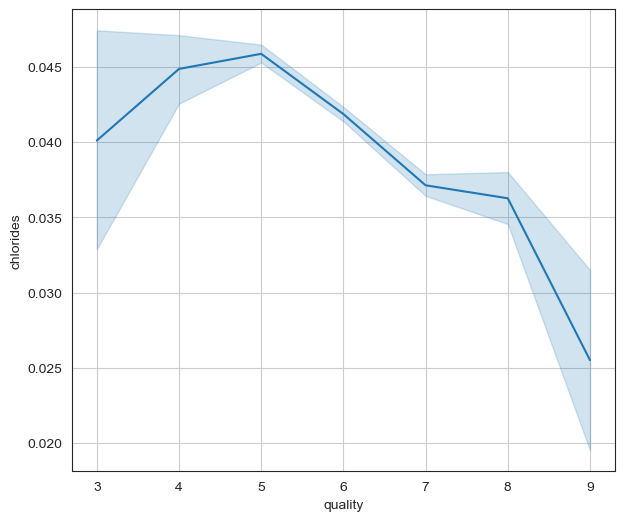

In [195]:
plt.figure(figsize=(7,6))
sns.lineplot(data=df, x="quality",y="chlorides")
plt.grid()
plt.show()

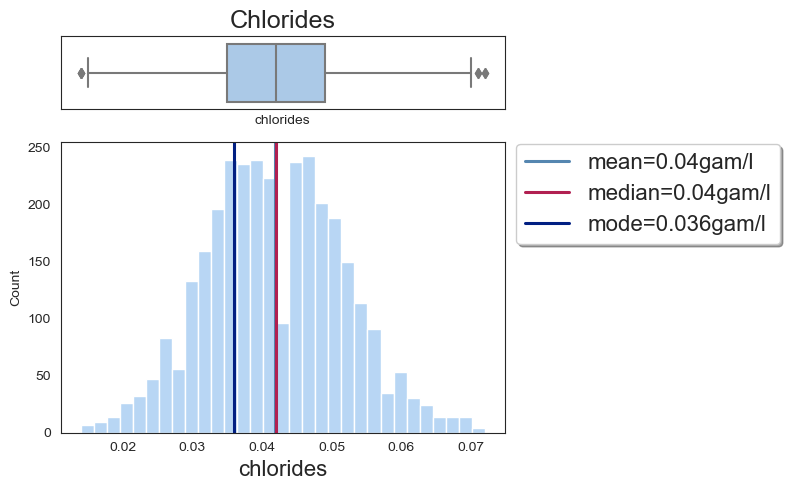

In [196]:
num_plot(df, 'chlorides','Chlorides','gam/l')

>- Hàm lượng chlorides trong các chai rượu không lớn, chỉ ở mức dưới 0,07 gam/l
>- Một lượng chloride thích hợp có thể giúp tăng cường hương vị và cân bằng tổng thể của rượu. Tuy nhiên, nồng độ chloride cao có thể tạo ra hương vị mặn, khó chịu và ảnh hưởng đến chất lượng tổng thể của rượu nên các chai rượu chất lượng tốt có nồng độ chlorides thấp hơn

### Total sulfur dioxide

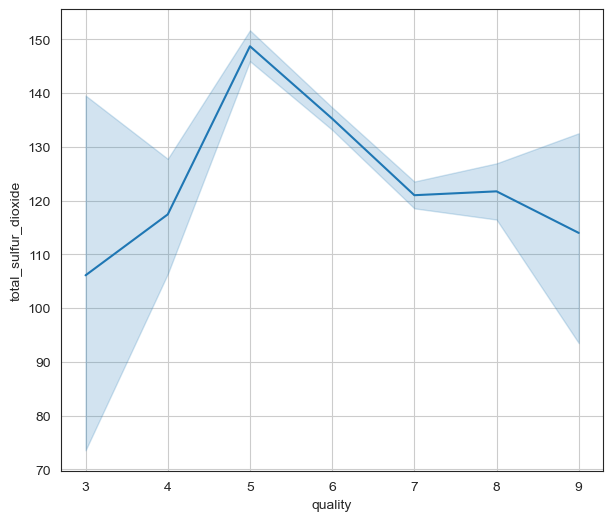

In [197]:
plt.figure(figsize=(7,6))
sns.lineplot(data=df, x="quality",y="total_sulfur_dioxide")
plt.grid()
plt.show()

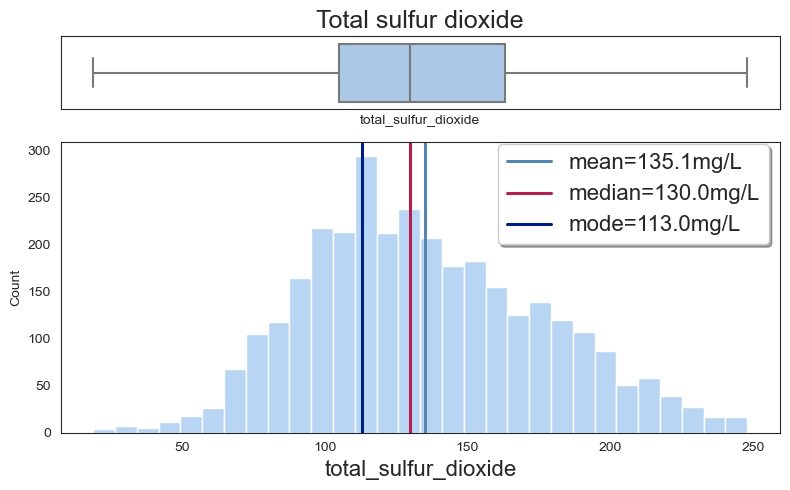

In [198]:
num_plot(df, 'total_sulfur_dioxide','Total sulfur dioxide','mg/L')

>- Trong bộ dữ liệu, giá trị trung bình của SO2 là 135.1 mg/L. Giá trị này ở mức trung bình khi SO2 thường giao động trong khoảng 50 đến 150 mg/L. Tương quan giữa SO2 và quality là âm, phù hợp với thực tế
>- SO2 có thể bảo quản thực phẩm và ngăn ngừa sự oxy hóa và phân hủy, kéo dài thời gian bảo quản
>- Tuy nhiên, sử dụng quá nhiều SO2 trong sản xuất rượu có thể ảnh hưởng đến chất lượng sản phẩm và sức khỏe người tiêu dùng
>- Ngoài ra, SO2 cũng có thể tác động đến hương vị, màu sắc và độ tinh khiết của rượu, làm giảm hương vị, mùi hương và làm rượu trở nên cứng và khó uống
>- Tương quan giữa SO2 và quality là âm, phù hợp với thực tế



### Alcohol

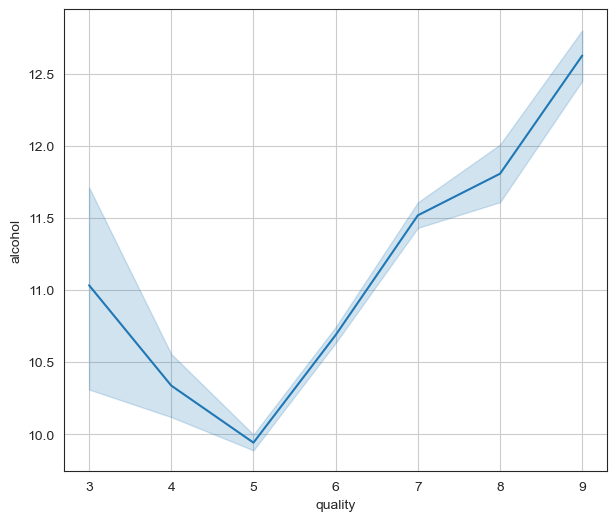

In [199]:
plt.figure(figsize=(7,6))
sns.lineplot(data=df, x="quality",y="alcohol")
plt.grid()
plt.show()

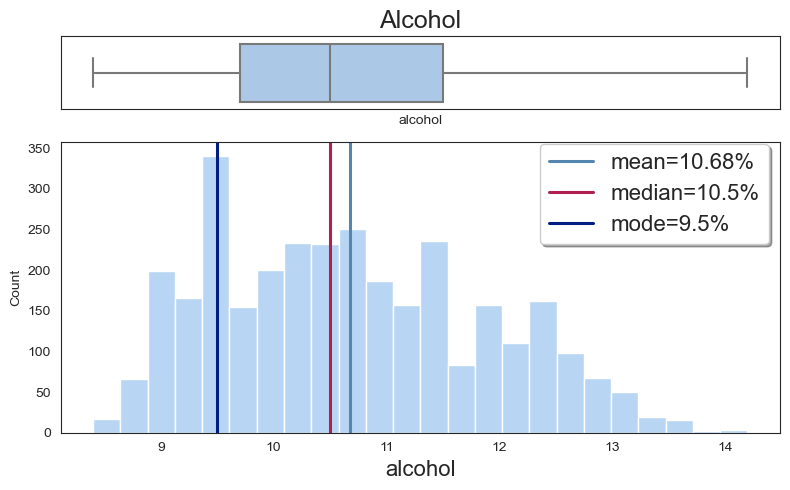

In [200]:
num_plot(df, 'alcohol','Alcohol','%')

>- Lượng alcohol khoảng 10,5% trong rượu có thể được coi là mức nồng độ trung bình
>- Lượng alcohol ở ngưỡng đó tạo ra một chai rượu có sự hài hòa về hương vị, trong khi vẫn tuân thủ nguyên tắc tiêu thụ rượu và không nguy hiểm với việc duy trì sức khỏe cá nhân

### Chi tiết về mối tương quan giữa các biến

**Tương quan giữa density với residual_sugar và total_sulfur_dioxide**

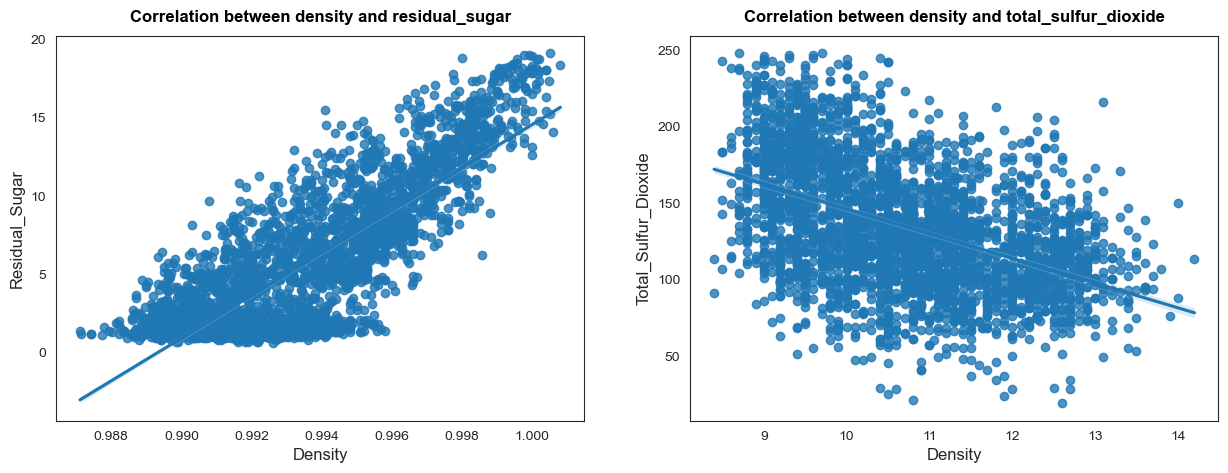

In [201]:
    fig, axes = plt.subplots(1, 2, figsize = (15,5))
    sns.regplot(ax = axes[0], x = 'density', y = 'residual_sugar', data = df)
    axes[0].set_title(f"Correlation between density and residual_sugar", loc = 'center', color = 'black', size = 12, weight = 'bold', pad = 10)
    axes[0].set_xlabel('density'.title(), size = 12)
    axes[0].set_ylabel('residual_sugar'.title(), size = 12)
    sns.regplot(ax = axes[1], x = 'alcohol', y = 'total_sulfur_dioxide', data = df)
    axes[1].set_title(f"Correlation between density and total_sulfur_dioxide", loc = 'center', color = 'black', size = 12, weight = 'bold', pad = 10)
    axes[1].set_xlabel('density'.title(), size = 12)
    axes[1].set_ylabel('total_sulfur_dioxide'.title(), size = 12)
    plt.show()

>Mối tương quan giữa tỷ trọng với lượng đường dư tương đối dễ hiểu. Hàm lượng đường cao thì tỷ trọng sẽ tăng. Khi cho lượng chất rắn vào chất lỏng, chắc chắn tỷ trọng trong chất lỏng đó sẽ tăng trên một đơn vị diện tích

**Tương quan giữa alcohol và density**

In [202]:
def corr_graph(x,y):
    sns.regplot(x=df[f'{x}'], y=df[f'{y}'], color = '#0e87cc',lowess=True,scatter_kws={'edgecolor':'black','alpha':.6},line_kws={"color": "red","linewidth":2})

Text(0.5, 1.0, 'Negative Correlation B/W Alcohol & Density')

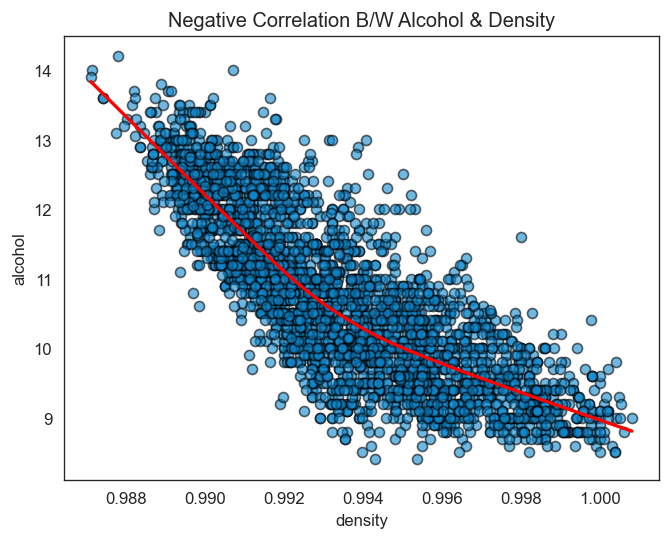

In [203]:
plt.figure(dpi=120)
corr_graph('density','alcohol')
plt.title("Negative Correlation B/W Alcohol & Density")

>- Tồn tại mối quan hệ nghịch biến giữa alcohol (cồn) và density (khối lượng riêng)
>- Mối quan hệ này tồn tại là do thành phần chính của cồn là etanol, có khối lượng riêng nhỏ hơn nước nên khi tăng nồng độ etanol, khối lượng riêng tổng thể của rượu sẽ giảm

**Tương quan giữ free sulfur dioxide và total sulfur dioxide**

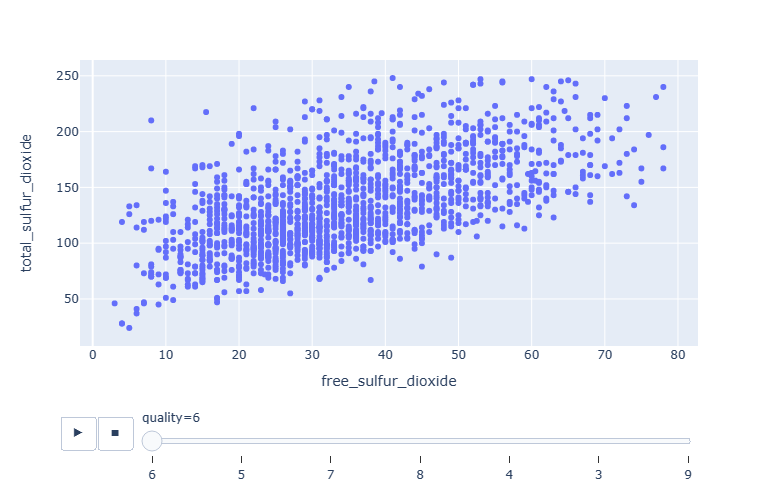

In [204]:

px.scatter(df, x="free_sulfur_dioxide", y="total_sulfur_dioxide",animation_frame="quality", width = 800, height = 500)

>Total sulfur dioxide (T-SO2) và Free sulfur dioxide (F-SO2) có mối quan hệ tuyến tính dương. Điều này là bởi T-SO2 bao gồm F-SO2 và SO2 đã kết hợp với các hợp chất khác trong rượu

**Tương quan của một số cặp biến khác trong mô hình**

In [205]:
df_q = df.copy()

df_q['quality_label'] = df_q['quality'].apply(lambda value: 'bad' 
                                                              if value <= 5 else 'good' )
df_q['quality_label'] = pd.Categorical(df_q['quality_label'], 
                                             categories=['bad', 'good'])

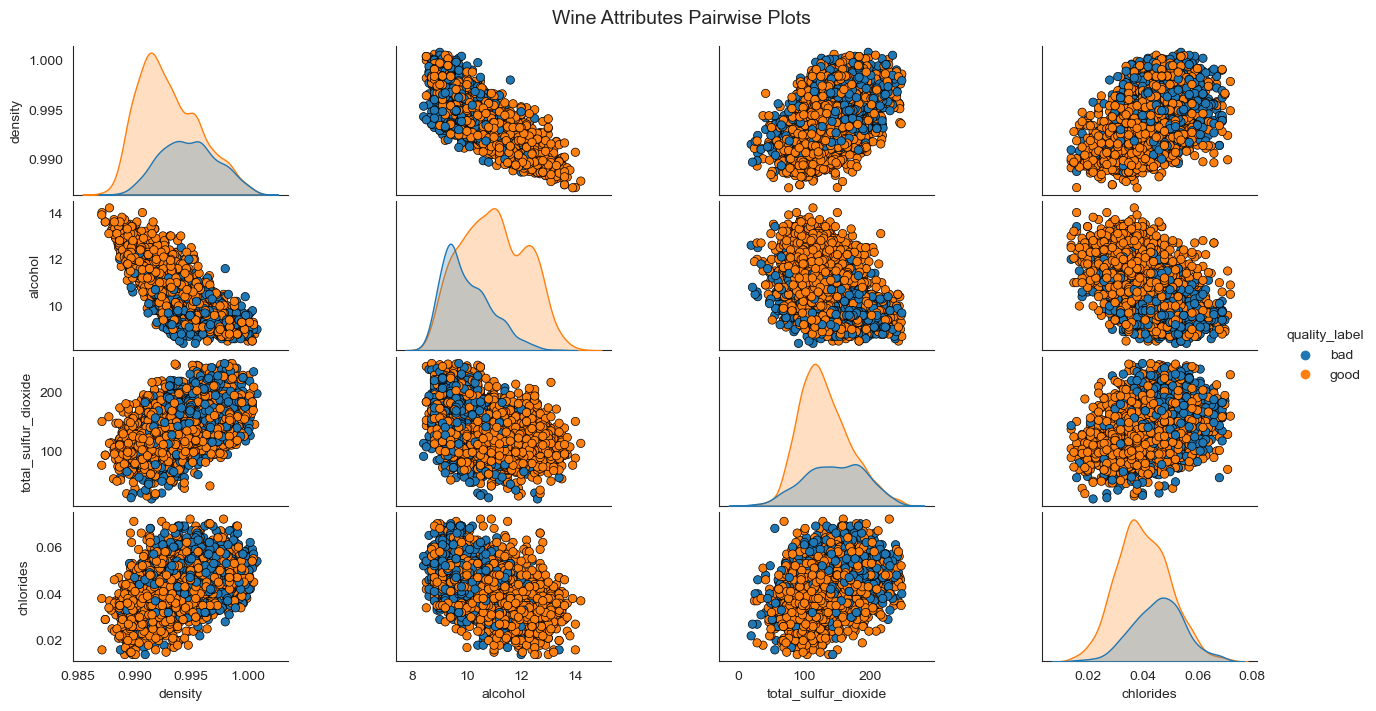

In [206]:
cols = ['density', 'alcohol', 'total_sulfur_dioxide', 'chlorides', 'quality_label']
pp = sns.pairplot(df_q[cols], height=1.8, hue = 'quality_label' , aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig  
fig.subplots_adjust(top=0.93, wspace=0.5)
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)


> Có thể thấy nhiều mối quan hệ tuyến tính ở mức yếu trong biểu đồ

# 4. Data Preprocessing

In [207]:
data=df.copy()

## 4.1. Labeling Data

In [208]:
bins = [0, 5, 10]
labels = [0, 1]
data['quality_label'] = pd.cut(data['quality'], bins=bins, labels=labels)
data.drop('quality', axis=1, inplace=True)
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality_label
0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
2,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
3,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,1
4,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,1


## 4.2. Train-test split

In [209]:
X=data[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
y=data['quality_label']

In [210]:
# use 80% of the data for training and 20% for testing
X_train_org, X_test_org, y_train_org, y_test_org = train_test_split(X,y, test_size=0.2, random_state=42,stratify=y)

## 4.3. Scaling

In [211]:
scaler = StandardScaler()
scaler.fit(X_train_org)
X_train_scaled=scaler.transform(X_train_org)
X_test_scaled=scaler.transform(X_test_org)

# 5. Modeling

## 5.1. Testing accuracy score of each model without hyperparameter tuning

In [212]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "RandomForestClassifier": RandomForestClassifier()
}

In [213]:
for key, classifier in classifiers.items():
    training_score = cross_val_score(classifier, X_train_scaled,y_train_org, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "has a training score of", round(training_score.mean(), 5) * 100, "% accuracy score")

Classifiers:  LogisticRegression has a training score of 75.166 % accuracy score
Classifiers:  KNeighborsClassifier has a training score of 74.932 % accuracy score
Classifiers:  RandomForestClassifier has a training score of 77.154 % accuracy score


## 5.2. Hyperparameter Tuning

### KNeighborClassifier

In [214]:
params = {'n_neighbors':list(range(1, 50, 2)), 'weights':['uniform', 'distance']}
gs = GridSearchCV(KNeighborsClassifier(), params,n_jobs=-1)
gs_results = gs.fit(X_train_scaled, y_train_org)
kneigh=gs_results.best_estimator_

In [215]:
kneigh_score = cross_val_score(kneigh, X_train_scaled, y_train_org, cv=5)
print('KNeighnorsClassifier Validation Score:', round(kneigh_score.mean() * 100, 2).astype(str) + '%')

KNeighnorsClassifier Validation Score: 77.08%


In [216]:
print('Best Parametrs: ', gs_results.best_params_)

Best Parametrs:  {'n_neighbors': 29, 'weights': 'distance'}


From above we can say that the best value k is 29.

In [217]:
prediction_k = kneigh.predict(X_test_scaled)
kneigh_accuracy = accuracy_score(y_test_org, prediction_k)
print('Accuracy of model at K=29 is', round(kneigh_accuracy.mean() * 100, 2).astype(str) + '%')

Accuracy of model at K=29 is 77.41%


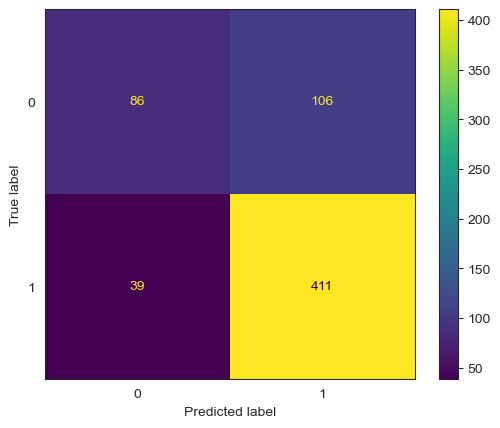

In [218]:
cm = confusion_matrix(y_test_org, prediction_k)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Logistic Regression

In [219]:
params = {'penalty': ['elasticnet', 'l2', 'l1', None],
             'C': [0.5, 0.6, 0.7, 0.8, 0.9, 1]}
gs = GridSearchCV(LogisticRegression(), params, n_jobs=-1) 
gs_result = gs.fit(X_train_scaled, y_train_org)
lg_rg = gs_result.best_estimator_
print('The best penalty is: ', lg_rg.get_params()['penalty'])
print('The best C is: ', lg_rg.get_params()['C'])

The best penalty is:  l2
The best C is:  1


In [220]:
logis_reg_score = cross_val_score(lg_rg, X_train_scaled, y_train_org, cv=5)
print('Logistic Regression Validation Score:', round(logis_reg_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Validation Score: 75.17%


In [221]:
prediction_lr = lg_rg.predict(X_test_scaled)
logis_accuracy = accuracy_score(y_test_org, prediction_lr)
print('Accuracy of model is', round(logis_accuracy.mean() * 100, 2).astype(str) + '%')

Accuracy of model is 74.3%


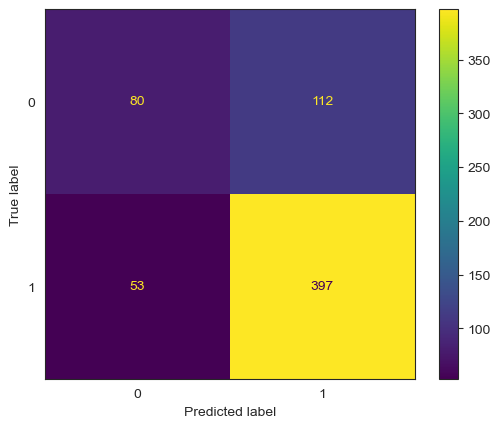

In [222]:
cm = confusion_matrix(y_test_org, prediction_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Random Forest Classifier

In [ ]:
rf_params = {'bootstrap': [True, False],
             'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
             'min_samples_leaf': [1, 2, 4],
             'min_samples_split': [2, 5, 10],
             'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

rf_grid = RandomizedSearchCV(RandomForestClassifier(random_state = 42), rf_params,n_jobs=-1,random_state=42)
rf_results = rf_grid.fit(X_train_org, y_train_org)
randforest=rf_results.best_estimator_

In [ ]:
rf_score = cross_val_score(randforest, X_train_org, y_train_org, cv=5)
print('Random Forest Classifier Validation Score:', round(rf_score.mean() * 100, 2).astype(str) + '%')

In [ ]:
prediction_rf = randforest.predict(X_test_org)
ranfo_accuracy = accuracy_score(y_test_org, prediction_rf)
print('Accuracy of model is', round(ranfo_accuracy.mean() * 100,2).astype(str) + '%')

In [ ]:
cm = confusion_matrix(y_test_org, prediction_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## 5.3. Conclusion

In [ ]:
print('Giá trị accuracy của KNeighborClassifier là: ', round(kneigh_accuracy.mean() * 100, 2).astype(str) + '%')
print('Giá trị accuracy của Logistic Regression là: ', round(logis_accuracy.mean() * 100, 2).astype(str) + '%')
print('Giá trị accuracy của Random Forest là: ', round(ranfo_accuracy.mean() * 100, 2).astype(str) + '%')

In [ ]:
#Kiểm tra các chỉ số đánh giá khác của mô hình Random Forest
print(classification_report(y_test_org, prediction))

In [ ]:
# Độ quan trọng của các đặc trưng trong mô hình Random Forest
importance = randforest.feature_importances_

sorted_indices = importance.argsort()[::-1]
sorted_importance = importance[sorted_indices]
sorted_features = X_train_org.columns[sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(range(len(importance)), sorted_importance)
plt.xticks(range(len(importance)), sorted_features, rotation=90)
plt.xlabel("Đặc trưng")
plt.ylabel("Độ quan trọng")
plt.title("Độ quan trọng của các đặc trưng")
plt.tight_layout()
plt.show()